[M1S05] Ex. 05 - Relatório Final

Este notebook reúne as principais análises dos dados de clientes, pedidos e produtos, gerando um relatório consolidado com visualizações.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Carregando os dados

Importamos os arquivos clientes.csv, pedidos.csv e produtos.csv para realizar as análises.

In [10]:
clientes = pd.read_csv('../../data/clientes.csv')
pedidos = pd.read_csv('../../data/pedidos.csv')
produtos = pd.read_csv('../../data/produtos.csv')

## Cliente que mais gastou

Identificamos o cliente com maior valor total de compras.

In [11]:
gastos_por_cliente = pedidos.groupby('id_cliente')['valor_total'].sum()
id_top_cliente = gastos_por_cliente.idxmax()
top_cliente = clientes[clientes['id_cliente'] == id_top_cliente]['nome'].values[0]
valor_top_cliente = gastos_por_cliente.max()
print(f'Cliente que mais gastou: {top_cliente} (R$ {valor_top_cliente:.2f})')

Cliente que mais gastou: Felipe Martins (R$ 1200.00)


## Ticket médio por categoria

Calculamos o ticket médio (valor médio de compra) para cada categoria de produto.

In [12]:
ticket_medio_categoria = produtos.groupby('categoria')['preco'].mean()
print(ticket_medio_categoria)

categoria
Eletrônicos    1725.54
Livros           89.90
Móveis          464.45
Papelaria        59.90
Utilidades       39.90
Name: preco, dtype: float64


## Cidade com maior número de clientes

Com os dados atuais, cada cidade possui apenas um cliente cadastrado. Portanto, não há uma cidade com maior número de clientes. Abaixo, exibimos a contagem de clientes por cidade para ilustrar essa distribuição.

In [13]:
contagem_cidades = clientes['cidade'].value_counts()
print(contagem_cidades)

cidade
Fortaleza         1
Recife            1
Salvador          1
Belo Horizonte    1
São Paulo         1
Rio de Janeiro    1
Curitiba          1
Porto Alegre      1
Campinas          1
Natal             1
Name: count, dtype: int64


Porém, se quisermos buscar aquela cidade com maior número de clientes, podemos executar:

In [8]:
cidade_top = clientes['cidade'].value_counts().idxmax()
num_clientes_top = clientes['cidade'].value_counts().max()
print(f'Cidade com maior número de clientes: {cidade_top} ({num_clientes_top} clientes)')

Cidade com maior número de clientes: Fortaleza (1 clientes)


## Visualizações

A seguir, criamos gráficos para ilustrar as principais análises do relatório.

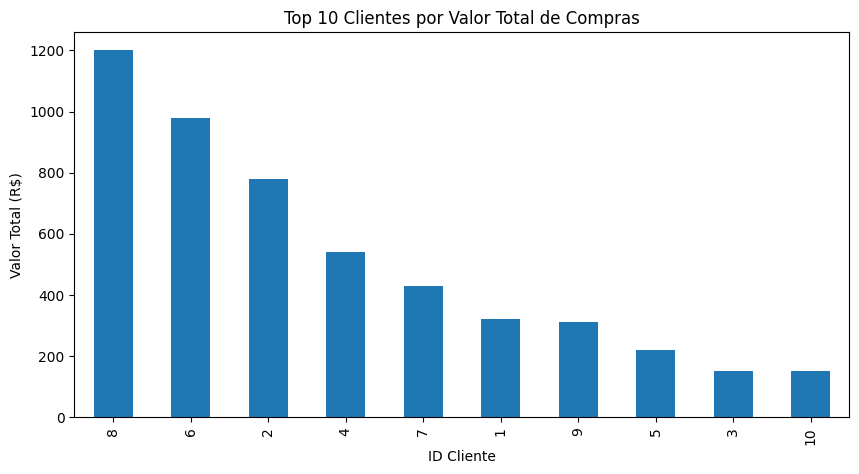

In [14]:
plt.figure(figsize=(10,5))
gastos_por_cliente.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Clientes por Valor Total de Compras')
plt.ylabel('Valor Total (R$)')
plt.xlabel('ID Cliente')
plt.show()

In [17]:
top_ids = gastos_por_cliente.sort_values(ascending=False).head(10).index
nomes_top = clientes.set_index('id_cliente').loc[top_ids]['nome']
for id_cliente, nome in zip(top_ids, nomes_top):
    print(f'ID {id_cliente}: {nome}')

ID 8: Felipe Martins
ID 6: Rafael Mendes
ID 2: Carlos Lima
ID 4: João Pereira
ID 7: Beatriz Rocha
ID 1: Ana Souza
ID 9: Juliana Silva
ID 5: Luciana Costa
ID 3: Mariana Alves
ID 10: Daniel Oliveira


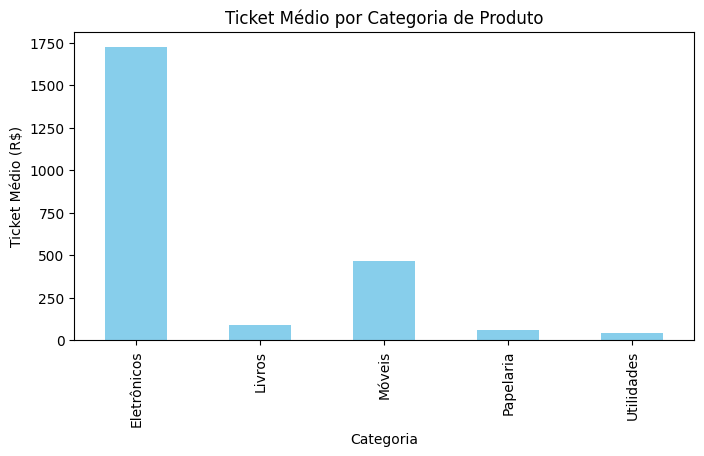

In [15]:
plt.figure(figsize=(8,4))
ticket_medio_categoria.plot(kind='bar', color='skyblue')
plt.title('Ticket Médio por Categoria de Produto')
plt.ylabel('Ticket Médio (R$)')
plt.xlabel('Categoria')
plt.show()

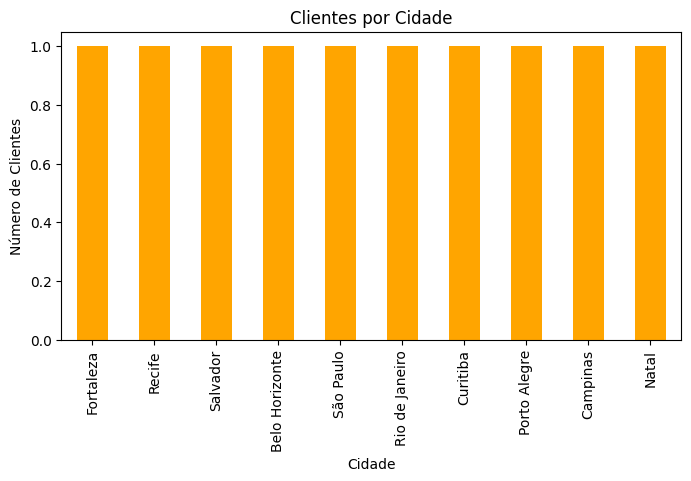

In [16]:
plt.figure(figsize=(8,4))
clientes['cidade'].value_counts().plot(kind='bar', color='orange')
plt.title('Clientes por Cidade')
plt.ylabel('Número de Clientes')
plt.xlabel('Cidade')
plt.show()